In [73]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [74]:
df = pd.read_excel('../dataset.xlsx')

In [75]:
df.shape

(6982, 2)

In [76]:
df.head()

,text,label
0,oh my gosh,1.0
1,"trouble sleeping, confused mind, restless hear...",1.0
2,"All wrong, back off dear, forward doubt. Stay ...",1.0
3,I've shifted my focus to something else but I'...,1.0
4,"I'm restless and restless, it's been a month n...",1.0


In [86]:
df.tail()

,text,label
3090,"Hiiii new bestiess '‹ðŸ'‹ check pinned me yu ,...",0.0
5734,"Iqbal, who is handsome, has a lot of money, an...",0.0
2900,The Governor of East Java expressed his apprec...,0.0
340,Feeling restless,1.0
1783,I don't understand this world.. the old t-shir...,0.0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6970 entries, 4235 to 1783
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    6970 non-null   object 
 1   label   6970 non-null   float64
dtypes: float64(1), object(1)
memory usage: 163.4+ KB


In [88]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [94]:
df = df.dropna()

In [95]:
df.shape

(6970, 2)

In [96]:
df = df.sample(frac = 1)

<Axes: xlabel='label', ylabel='count'>

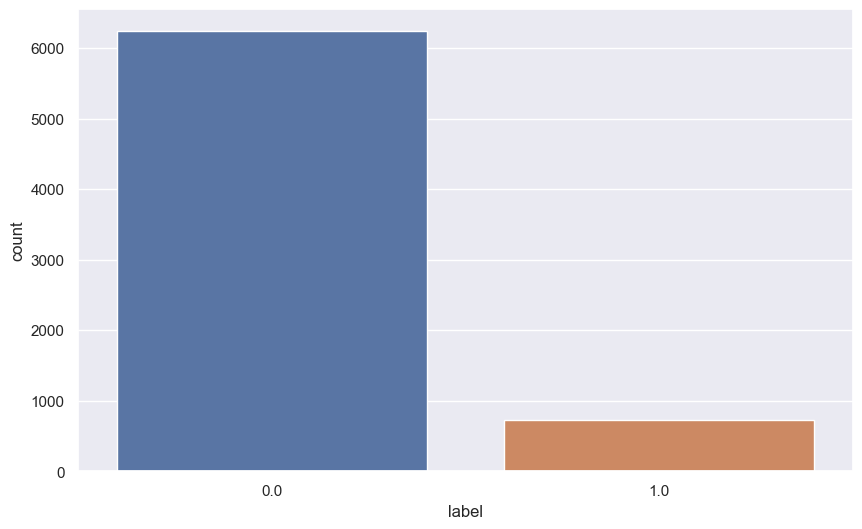

In [97]:
sns.countplot(x=  df.label)

In [98]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# import spacy
import string
from bs4 import BeautifulSoup

In [99]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [100]:
def text_transformation(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text


In [101]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [102]:
def text_cleaner(text):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    newString = re.sub('[m]{2,}', 'mm', newString)
    return newString

In [103]:
df['cleaned'] = df["text"].apply(text_cleaner)

C:\Users\asus\AppData\Local\Temp\ipykernel_16656\57854106.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  newString = BeautifulSoup(newString, "lxml").text


In [104]:
!pip install matplotlib
!pip install wordcloud



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


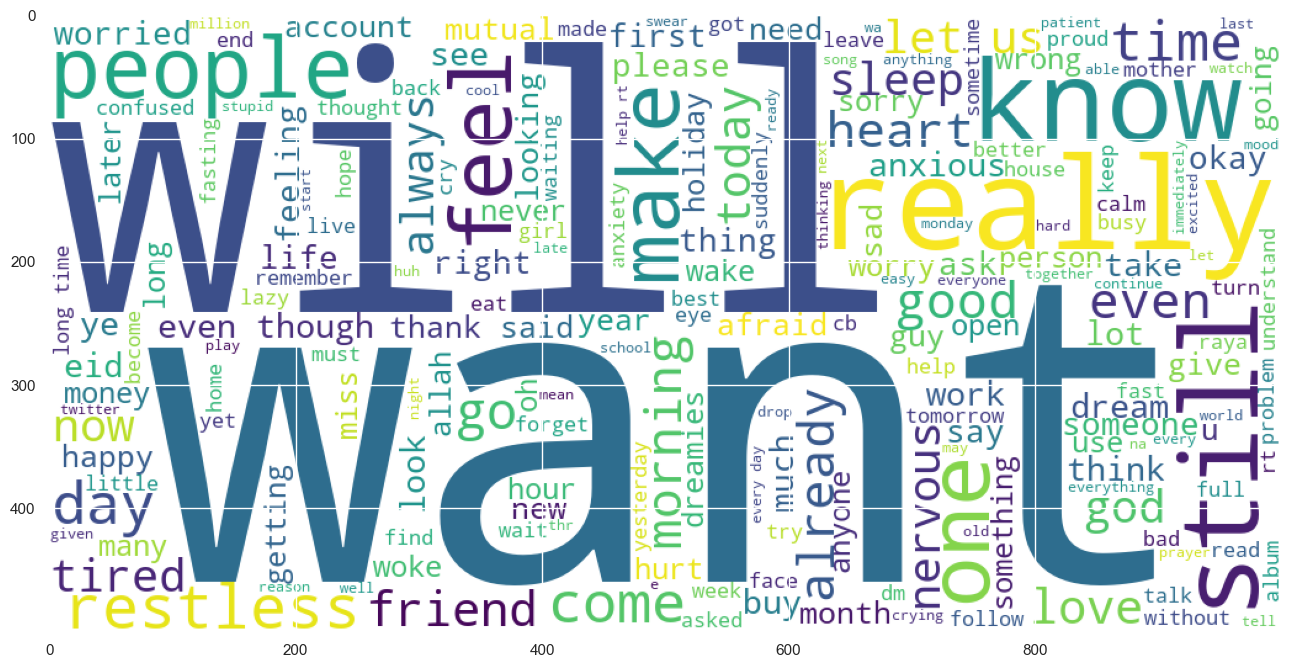

In [105]:
from wordcloud import WordCloud
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in df['cleaned']:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 6).generate(word_cloud)
plt.imshow(wordcloud)

In [106]:
df.tail()

,text,label,cleaned
2765,I'm dizzy looking at my own pp,0.0,i am dizzy looking at my own pp
4474,Antuna HDSPTMS! â,0.0,antuna hdsptms
1219,Boey 101,0.0,boey
5026,NEYO IS BLASIAN?,0.0,neyo is blasian
266,"so please be worried, what version will I get ™‚",1.0,so please be worried what version will i get


In [107]:
X = df.cleaned
y = df.label

In [108]:
vect = CountVectorizer(max_features = 20000 , lowercase=False , ngram_range=(1,2))

In [109]:
X_cv =vect.fit_transform(X).toarray()

In [110]:
X_cv.shape

(6970, 20000)

In [111]:
X_train,X_test,y_train,y_test = train_test_split(X_cv,y,test_size = 0.2,random_state = 1,stratify = y, shuffle=True)

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,VotingClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [113]:
def performance_eval(clf,X_test):
    y_pred = clf.predict(X_test)
    print(f'Accuracy : {accuracy_score(y_test,y_pred)}\n')
    print('   ------------ Classification Report -----------')
    print(classification_report(y_test,y_pred))
    print('   ------------ Confusion Matrix -------------- ')
    sns.set(rc={'figure.figsize':(10,6)})
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt = 'd')

In [114]:
# clf_lr = LogisticRegression()
# clf_lr.fit(X_train, y_train)
# performance_eval(clf_lr,X_test)

In [115]:
# clf_nb = MultinomialNB()
# clf_nb.fit(X_train, y_train)
# performance_eval(clf_nb,X_test)

In [116]:
# clf_dt = DecisionTreeClassifier()
# clf_dt.fit(X_train, y_train)
# performance_eval(clf_dt,X_test)

In [117]:
# clf_svm = SVC()
# clf_svm.fit(X_train, y_train)
# performance_eval(clf_svm,X_test)

In [118]:
# clf_knn = KNeighborsClassifier()
# clf_knn.fit(X_train, y_train)
# performance_eval(clf_knn,X_test)

In [119]:
# clf_adb = AdaBoostClassifier()
# clf_adb.fit(X_train, y_train)
# performance_eval(clf_adb,X_test)

Accuracy : 0.9835007173601148

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1248
         1.0       0.98      0.86      0.92       146

    accuracy                           0.98      1394
   macro avg       0.98      0.93      0.95      1394
weighted avg       0.98      0.98      0.98      1394

   ------------ Confusion Matrix -------------- 


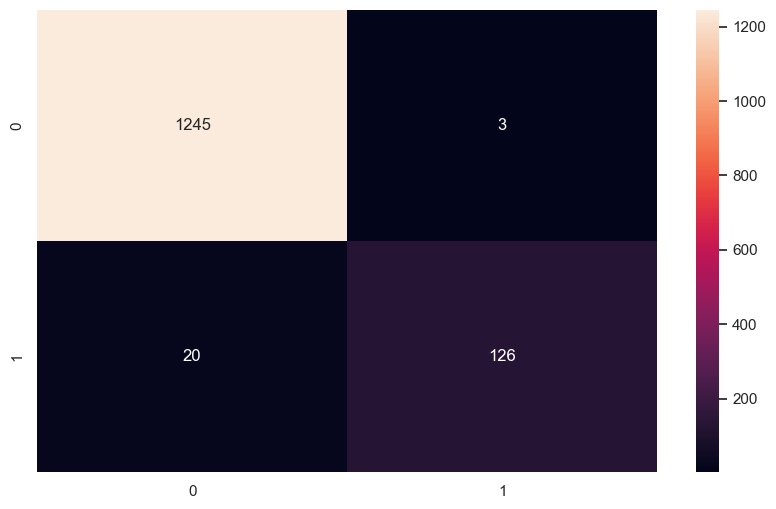

In [120]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
performance_eval(clf_rf,X_test)

In [121]:
# voting_clf = VotingClassifier(estimators=[('SVC', clf_svm),
#                                           ('LogReg', clf_lr),
#                                           ('RF', clf_rf),
#                                           ('AdaBoost',clf_adb),
#                                           ('KNN',clf_knn),
#                                           ('NB',clf_nb),
#                                           ('DT',clf_dt)
#                                          ],
#                               voting='hard'
#                              )
# voting_clf.fit(X_train, y_train)
# performance_eval(voting_clf,X_test)

In [122]:
import pickle
filename = r'C:\Users\asus\Downloads\Project_final\Project 2\models\CV_BestModel.sav'
pickle.dump(clf_rf, open(filename, 'wb'))

In [123]:
text = "I am / exhauted :) and restless."

In [124]:
clean_text = text_cleaner(text)

C:\Users\asus\AppData\Local\Temp\ipykernel_16656\57854106.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  newString = BeautifulSoup(newString, "lxml").text


In [128]:
loaded_model = pickle.load(open(r'C:\Users\asus\Downloads\Project_final\Project 2\models\CV_BestModel.sav', 'rb'))
single_prediction = loaded_model.predict(vect.transform([clean_text]).toarray())[0]

In [129]:
output = {0:"No Anxiety/Depression",
          1:"Anxiety/Depression"}
print(output[single_prediction])

Anxiety/Depression


In [130]:
text = "WHICH IS THE REAL TEMPLATE?"
clean_text = text_cleaner(text)
loaded_model = pickle.load(open(r'C:\Users\asus\Downloads\Project_final\Project 2\models\CV_BestModel.sav', 'rb'))
single_prediction = loaded_model.predict(vect.transform([clean_text]).toarray())[0]
output = {0:"No Anxiety/Depression",
          1:"Anxiety/Depression"}
print(output[single_prediction])

No Anxiety/Depression
